In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objs as go

%matplotlib inline

In [94]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [95]:
df = pd.read_csv('avocado_mean.csv')
df.head()

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


In [96]:
df.rolling(window=3).mean().max().round(2)

AveragePrice    1.85
dtype: float64

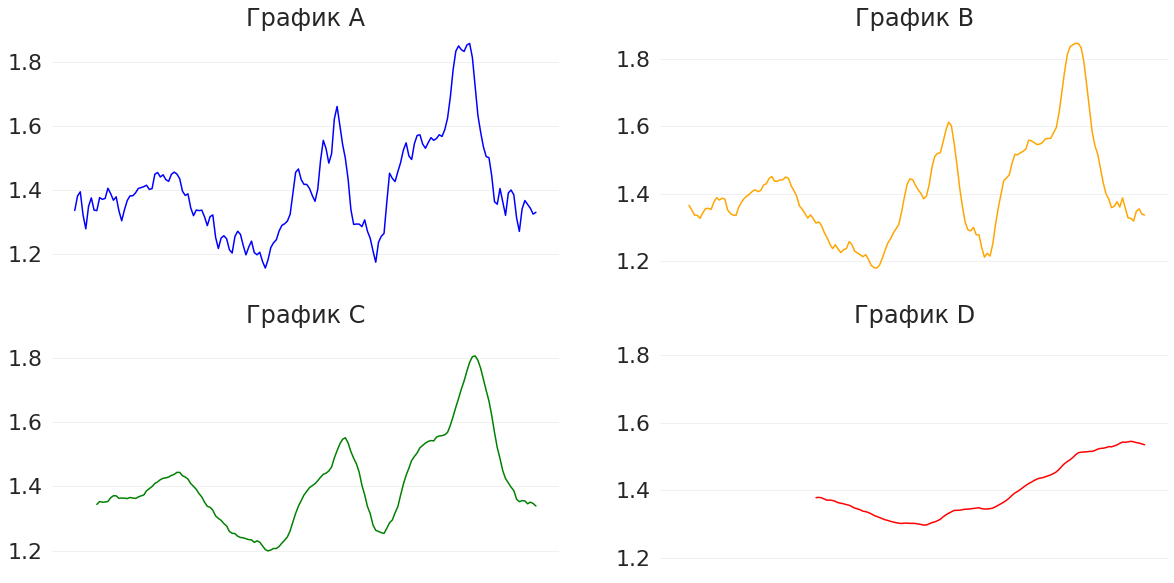

In [97]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)
windows = [2, 4, 10, 50]
colors = ['blue', 'orange', 'green', 'red']

for window, ax, color in zip(windows, axes.flatten(), colors): 
    ax.plot(df.rolling(window=window).mean(), label=window, color=color)
for ax in axes.flatten():
    # удаляем рамку
    ax.set_frame_on(False)  
    # устанавливаем major locator – 4 января для каждого года
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=4))  
    # показывать в формате сокращенного названия месяца и дня (Jan 04)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    # под major locator - minor locator, т.е. редактируем minor ticks
    ax.xaxis.set_minor_locator(mdates.YearLocator(month=1, day=1))
    # показываем год
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
    # делаем сетку графика совсем немного серой и наполовину прозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)
for name, ax in zip(['A','B','C','D'], axes.flatten()):
    ax.set(title='График {}'.format(name))
    ax.tick_params(labelbottom=True, which='both')    
plt.show()

In [98]:
df.AveragePrice.ewm(span=2).mean()

0      1.301296
1      1.353310
2      1.379480
3      1.391394
4      1.294758
         ...   
164    1.356212
165    1.352194
166    1.340793
167    1.322734
168    1.338812
Name: AveragePrice, Length: 169, dtype: float64

In [99]:
avacado_full = pd.read_csv('avocado_full.csv', index_col=0)

In [100]:
avacado_full.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [101]:
organic_avocado_in_Chikago = avacado_full[(avacado_full['type'] == 'organic') & (avacado_full['region'] == 'Chicago')]
organic_avocado_in_Chikago

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago
2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago
2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago


In [106]:
organic_avocado_in_Chikago['rolling_mean'] = organic_avocado_in_Chikago['AveragePrice'].rolling(window=4).mean().round(3)
organic_avocado_in_Chikago['ewm_mean'] = organic_avocado_in_Chikago['AveragePrice'].ewm(span=4).mean().round(3)
organic_avocado_in_Chikago

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,rolling_mean,ewm_mean
Date,,,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago,NaN,1.490
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago,NaN,1.678
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago,NaN,1.745
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago,1.730,1.784
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago,1.737,1.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago,1.652,1.677
2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago,1.652,1.654
2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago,1.655,1.656


In [107]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=organic_avocado_in_Chikago.index, y=organic_avocado_in_Chikago['rolling_mean'], mode='lines', name='Rolling Mean'))
fig.add_trace(go.Scatter(x=organic_avocado_in_Chikago.index, y=organic_avocado_in_Chikago['ewm_mean'], mode='lines', name='Exponential Moving Average'))

fig.update_layout(title='Avocado Prices in Chicago (Organic)',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  legend=dict(x=0, y=1, traceorder='normal'))